In [ ]:
print ('Hello world')

Hello world


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('Цены ВБ.xlsx', skiprows=2)
df.head()

,Дата,277503519,278324976,248946359,306096104,255796969,182404057,90116547,153088675,153203825,...,209240844,216291819,156970391,209242389,234136855,9391510,18364130,309985228,15396161,126668875
0,2025-02-17 14:00:00,47510,45999,47510,53153,51298,6259,7705,7586,7468,...,696,693,611,726,251,412,412,341,720,561
1,2025-02-17 15:00:00,47510,45999,47510,53153,51298,6259,7705,7586,7468,...,696,693,611,726,251,412,412,341,720,561
2,2025-02-17 16:00:00,47510,45999,47510,53153,51298,6259,7705,7586,7468,...,688,685,604,718,251,401,401,332,712,555
3,2025-02-17 17:00:00,47510,45999,47510,53153,51298,6259,7705,7586,7468,...,688,685,604,718,251,401,401,332,712,555
4,2025-02-17 18:00:00,47510,45999,47510,53153,51298,6259,7705,7586,7468,...,688,685,604,718,251,401,401,332,712,555


Гипотеза: цена на один и тот же товар изменяется у различных продавцов синхронно, что может свидетельстовать о использовании продавцами алгоритмических роботов для ценообразования или олигополистического сговора. Выберем некоторые категории товаров, соберём цены. Потом ряды цен на один и тот же товар у разных продавцов протестируем на наличие синхронных структурных сдвигов

Сейчас мы подготовим данные к анализу:
1. Удалим столбец с пропусками (столбец с очками)
2. Заполним пропущенные данные (это 1 столбец с другими очками, который служит заменой) следующим образом: Возьмем первую доступную цену и заполним пропущенные столбцы выше, это не должно сильно повлиять на наш анализ и выводы, так как мы заполним меньше 20 сттрок таким образом и всего на 1 товар
3. Сделаем столбец с датой индексом
4. Поделим даты по категориям. Мы знаем что в каждой категории 5 товаров и в каждом товаре по 5 продавцов. Есть 1 исключение, это бытовая техника, там 4 товара по 5 продавцов, так как мы забыли добавить стиральную машину.



In [ ]:
df["Дата"] = pd.to_datetime(df["Дата"])
df.set_index("Дата", inplace=True)

In [ ]:
df.head()

,277503519,278324976,248946359,306096104,255796969,182404057,90116547,153088675,153203825,270872197,...,209240844,216291819,156970391,209242389,234136855,9391510,18364130,309985228,15396161,126668875
Дата,,,,,,,,,,,,,,,,,,,,,
2025-02-17 14:00:00,47510,45999,47510,53153,51298,6259,7705,7586,7468,10417,...,696,693,611,726,251,412,412,341,720,561
2025-02-17 15:00:00,47510,45999,47510,53153,51298,6259,7705,7586,7468,10417,...,696,693,611,726,251,412,412,341,720,561
2025-02-17 16:00:00,47510,45999,47510,53153,51298,6259,7705,7586,7468,10417,...,688,685,604,718,251,401,401,332,712,555
2025-02-17 17:00:00,47510,45999,47510,53153,51298,6259,7705,7586,7468,10417,...,688,685,604,718,251,401,401,332,712,555
2025-02-17 18:00:00,47510,45999,47510,53153,51298,6259,7705,7586,7468,10417,...,688,685,604,718,251,401,401,332,712,555


In [ ]:
df.drop(columns=[171289236], inplace=True) # Удаляем столбец данные по которому не получилось собрать

In [ ]:
df.loc[df[249820881] == 'Замена товара 171289236', 249820881] = 3198 # Заменяем 20 строк на цену первого доступного периода

In [ ]:
df_cat = pd.read_excel('Цены ВБ.xlsx')
df_cat = df_cat.loc[:,~(df_cat==171289236).any()]
col =[]
categories = list(df_cat.columns)
categories = list(filter(lambda x: 'Unnamed' not in x, categories))
categories=categories[1::]

for i in range(6):
    if i == 0:
        col+=[categories[i]]*20
    else:
        col+=[categories[i]]*25
catagories_colums = col

In [ ]:
df_goods = pd.read_excel('Цены ВБ.xlsx', skiprows = 1)
df_goods = df_goods.loc[:,~(df_goods==171289236).any()]
good =[]
goods = list(df_goods.columns)
goods = list(filter(lambda x: 'Unnamed' not in x, goods))
goods=goods[1::]
for i in range(29):
    good+=[goods[i]]*5
goods_columns = good

In [ ]:
# Получили таблицу, в которой артикулы соотносятся с товарами и категориями
data={'Категория':catagories_colums,
      'Товар':goods_columns,
      'Артикул': list(df.columns)

}
df_catalog = pd.DataFrame(data)

df_catalog


,Категория,Товар,Артикул
0,Бытовая техника,Телевизор,277503519
1,Бытовая техника,Телевизор,278324976
2,Бытовая техника,Телевизор,248946359
3,Бытовая техника,Телевизор,306096104
4,Бытовая техника,Телевизор,255796969
...,...,...,...
140,Товары для дома,Свечи светодиодные,9391510
141,Товары для дома,Свечи светодиодные,18364130
142,Товары для дома,Свечи светодиодные,309985228
143,Товары для дома,Свечи светодиодные,15396161


In [ ]:
df_percent_change = df.pct_change()
df_percent_change

<ipython-input-24-18d31f099e7c>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_percent_change = df.pct_change()


,277503519,278324976,248946359,306096104,255796969,182404057,90116547,153088675,153203825,270872197,...,209240844,216291819,156970391,209242389,234136855,9391510,18364130,309985228,15396161,126668875
Дата,,,,,,,,,,,,,,,,,,,,,
2025-02-17 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-17 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2025-02-17 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.011494,-0.011544,-0.011457,-0.011019,0.0,-0.026699,-0.026699,-0.026393,-0.011111,-0.010695
2025-02-17 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2025-02-17 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2025-03-09 10:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2025-03-09 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


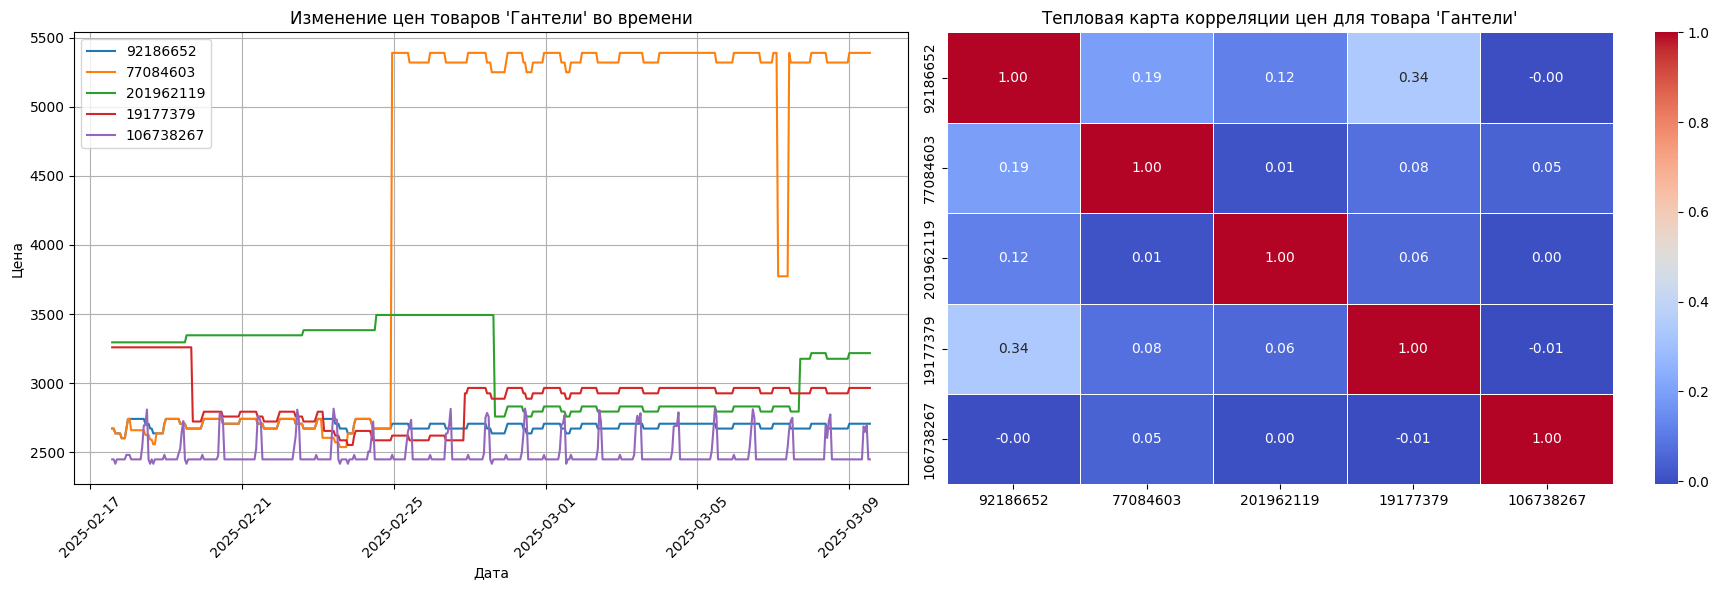

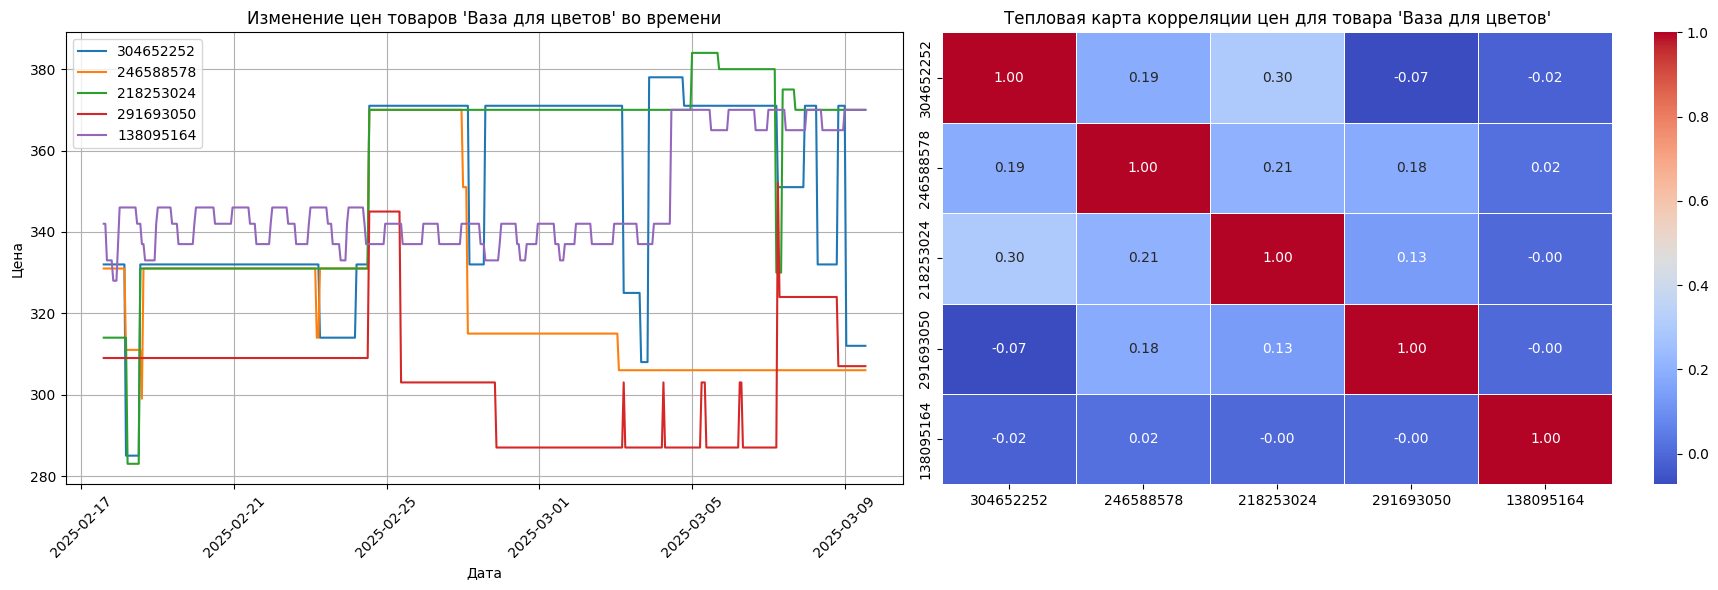

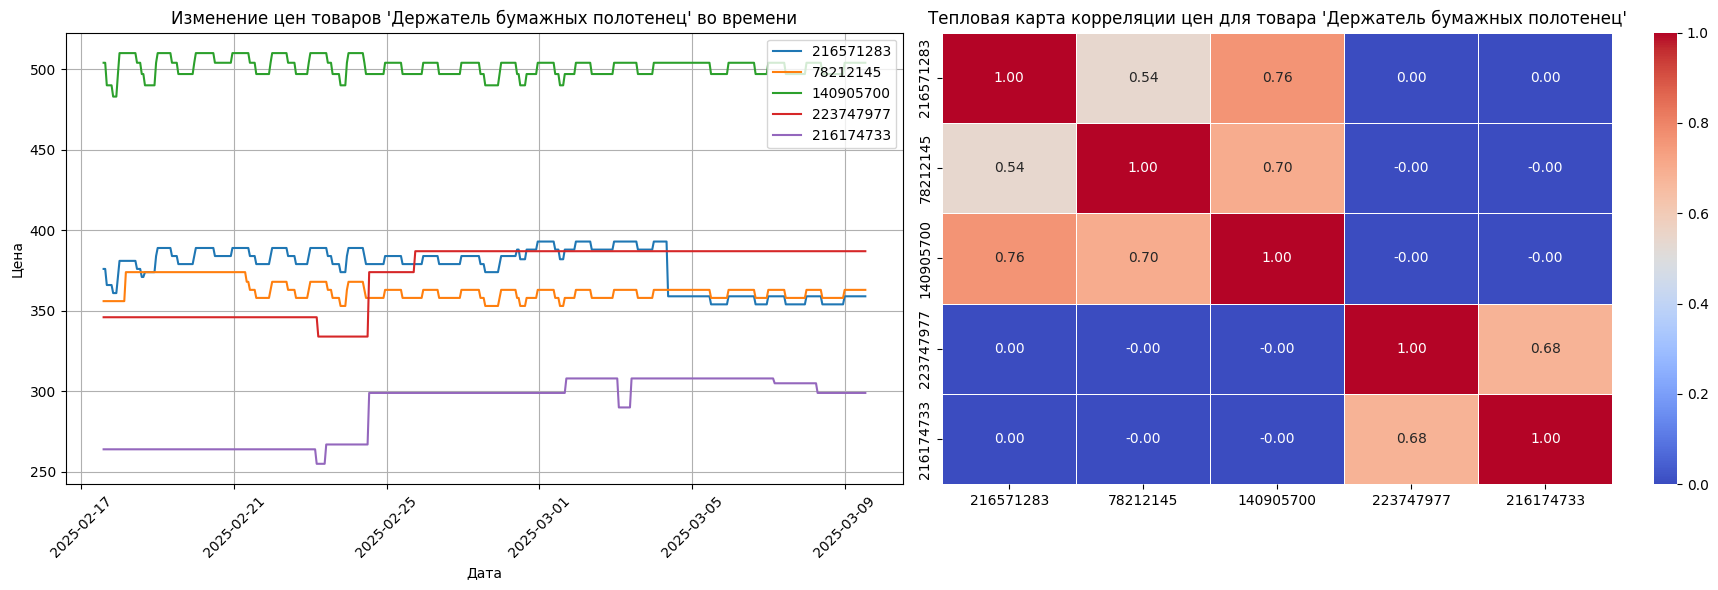

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count = 0
figsize = (18, 6)

for good in set(goods_columns):
    list_of_articuls_for_goods = list(df_catalog[df_catalog['Товар'] == good]['Артикул'])

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    for product in list_of_articuls_for_goods:
        axes[0].plot(df.index, df[product], label=product)
    axes[0].set_xlabel("Дата")
    axes[0].set_ylabel("Цена")
    axes[0].set_title(f"Изменение цен товаров '{good}' во времени")
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid()

    corr_matrix = df_percent_change[list_of_articuls_for_goods].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"Тепловая карта корреляции цен для товара '{good}'")

    plt.tight_layout()
    plt.show()

    count += 1
    if count == 3:
        break


In [ ]:
df_percent_change.describe()

,277503519,278324976,248946359,306096104,255796969,182404057,90116547,153088675,153203825,270872197,...,209240844,216291819,156970391,209242389,234136855,9391510,18364130,309985228,15396161,126668875
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,...,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,-0.000139,0.000004,0.000319,-0.000144,-0.000170,0.000536,0.000020,0.000332,0.000096,-0.000670,...,0.000231,0.000160,0.000293,-0.000104,-0.000063,0.000247,0.000010,0.000709,-0.000316,0.000119
std,0.012268,0.002754,0.026206,0.002226,0.014322,0.008143,0.011854,0.011676,0.012838,0.011032,...,0.008533,0.011329,0.012251,0.004070,0.006460,0.007896,0.007832,0.025102,0.010607,0.002697
min,-0.090739,-0.041668,-0.144557,-0.035222,-0.169997,0.000000,-0.150728,-0.126770,-0.160018,-0.189252,...,-0.052045,-0.150266,-0.119048,-0.052342,-0.115538,-0.061602,-0.078125,-0.195402,-0.221053,-0.010695
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.123183,0.043479,0.235313,0.000000,0.156652,0.153001,0.158838,0.145174,0.190501,0.065220,...,0.162824,0.176839,0.152801,0.055233,0.055556,0.090909,0.100737,0.433414,0.055556,0.057041
